In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import random
import numpy as np

F = len('Filip')
L = len('Olszowski')

N = (L+F)*100
print(f'N is equal to {N}')

N is equal to 1400


<b>Exercise 1</b>

Generating data

In [2]:
model_1 = CmdStanModel(stan_file="Data\code_1.stan")
model_2 = CmdStanModel(stan_file="Data\code_2.stan")

data = {'N':N}
samples_1 = model_1.sample(data)
samples_2 = model_2.sample(data)

y_1 = samples_1.stan_variable("y")
y_2 = samples_2.stan_variable("y")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


<b>Excercise 2</b>

In [3]:
model_3 = CmdStanModel(stan_file="Data\code_3.stan")
model_4 = CmdStanModel(stan_file="Data\code_4.stan")

data_3 = {'N': N, 'y': y_1[random.randint(0,len(y_1)-1)]}
data_4 = {'N': N, 'y': y_2[random.randint(0,len(y_2)-1)]}

samples_3 = model_3.sample(data_3)
samples_4 = model_4.sample(data_4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


C:\Users\solar\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

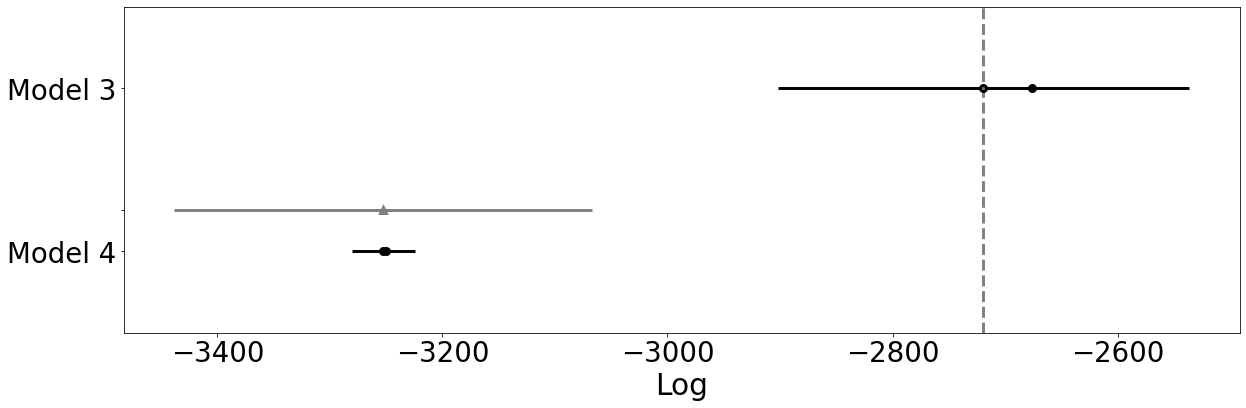

In [4]:
compare_dict = {"Model 3": samples_3, "Model 4": samples_4}
comparison = az.compare(compare_dict, ic='loo')
az.plot_compare(comparison, figsize=(20,6))

C:\Users\solar\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<AxesSubplot:xlabel='Log'>

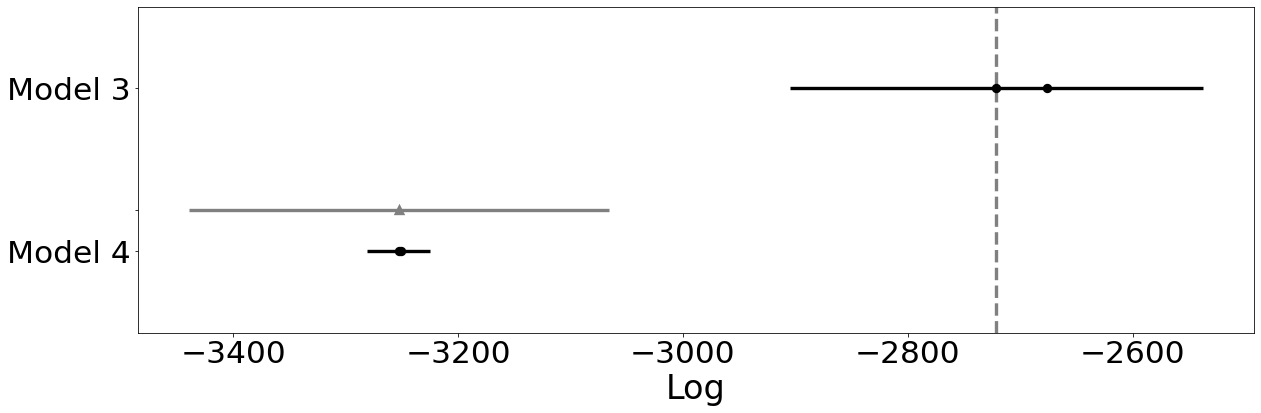

In [5]:
compare_dict = {"Model 3": samples_3, "Model 4": samples_4}
comparison = az.compare(compare_dict, ic='waic')
az.plot_compare(comparison, figsize=(20,6))

<b>Excercise 3</b>

In [6]:
model_5 = CmdStanModel(stan_file="Data\code_5.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


C:\Users\solar\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\solar\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

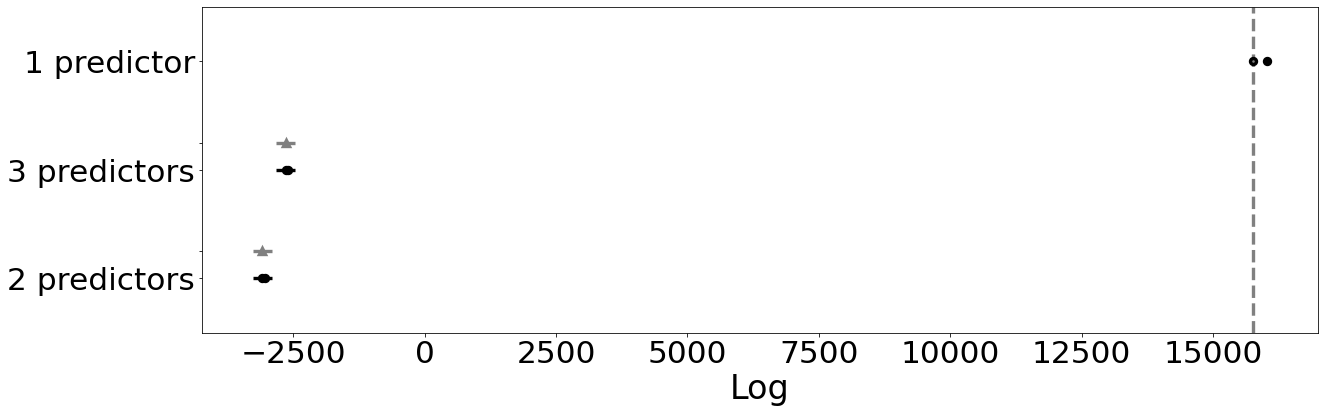

In [7]:
r = random.randint(0,len(y_1)-1)
data_5 = {'N': N, 'y': y_1[r], 'K': 1, 'X': np.array(y_1[r]).reshape(1400,1)}
samples_5_1 = model_5.sample(data_5)

r = random.randint(0,len(y_1)-1)
data_5 = {'N': N, 'y': y_1[r], 'K': 2, 'X': np.array([y_1[r], y_1[r+1]]).reshape(1400,2)}
samples_5_2 = model_5.sample(data_5)

r = random.randint(0,len(y_1)-1)
data_5 = {'N': N, 'y': y_1[r], 'K': 3, 'X': np.array([y_1[r-1], y_1[r], y_1[r+1]]).reshape(1400,3)}
samples_5_3 = model_5.sample(data_5)

compare_dict = {"1 predictor": samples_5_1, "2 predictors": samples_5_2, '3 predictors': samples_5_3}
comparison = az.compare(compare_dict)
az.plot_compare(comparison, figsize=(20,6))